In [1]:
import tensorflow as tf
import numpy as np

BATCH_SIZE = 100
IMG_HEIGHT = 224
IMG_WIDTH = 224

2023-01-21 10:17:36.336814: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# we need to specify the classes we would be looking for to 
# the imagedata generators
classes = [
    'Tomato___Late_blight',
'Tomato___healthy',
'Tomato___Early_blight',
'Tomato___Septoria_leaf_spot',
'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
'Tomato___Bacterial_spot',
'Tomato___Target_Spot',
'Tomato___Tomato_mosaic_virus',
'Tomato___Leaf_Mold',
'Tomato___Spider_mites Two-spotted_spider_mite'
]

In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = '/Users/msughter/Downloads/tomato/train'
validation_dir = '/Users/msughter/Downloads/tomato/val'
# Image datagenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_datagenerator = train_datagen.flow_from_directory(
     train_dir,
        batch_size=BATCH_SIZE,
        shuffle=True,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        classes = classes,
)

validation_datagenerator = validation_datagen.flow_from_directory(
    validation_dir,
     target_size=(IMG_HEIGHT, IMG_WIDTH),
        classes = classes,
        batch_size=BATCH_SIZE
)

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [4]:
# load the model for evaluation
model = tf.keras.models.load_model('model_1.h5')

2023-01-21 10:20:22.460541: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.evaluate(validation_datagenerator)

/Users/msughter/projects/denv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


10/10 [==============================] - 20s 2s/step - loss: 0.2258 - accuracy: 0.9330


[0.22584418952465057, 0.9330000281333923]

In [8]:
def getData(generator, iterations):
    features = []
    labels = []
    i = 1
    for _,(image_batch,label_batch) in enumerate(generator):
        if i > iterations:
            break
        print(f'extracting features for batch.....{i}')
        for img, label in zip(image_batch,label_batch):
            features.append(img)
            labels.append(label)
        i+=1
    return features, labels

In [9]:
# get 500 images for testing
train_x, train_y = getData(validation_datagenerator,5)

extracting features for batch.....1
extracting features for batch.....2
extracting features for batch.....3
extracting features for batch.....4
extracting features for batch.....5


In [10]:
# importing some evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [16]:
predictions = model.predict(np.array(train_x))

16/16 [==============================] - 10s 633ms/step


In [17]:
len(predictions)

500

In [23]:
# reshape predictions and targets
new_predictions = np.argmax(predictions,axis=1)
new_test_y = np.argmax(train_y,axis=1)

new_test_y[10]

4

In [27]:
# get the labels to be used in the confusion
uniques_predictions = np.unique(new_predictions)
unique_test_y = np.unique(new_test_y)
labels=list(set(uniques_predictions).union(set(unique_test_y)))

In [29]:
cm = confusion_matrix(new_test_y,new_predictions,labels=labels)

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)

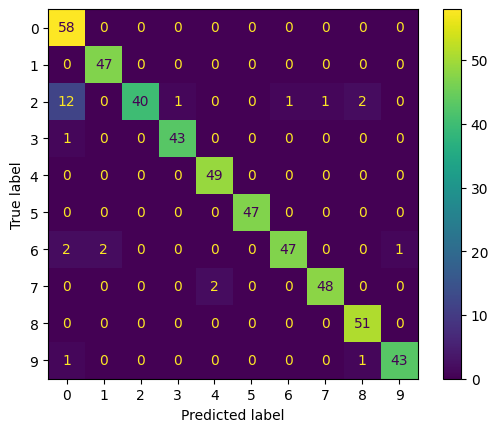

In [31]:
# plot the confusion matrix
disp.plot()

In [35]:
from sklearn.metrics import classification_report
report = classification_report(new_test_y,new_predictions,target_names=classes)
print(report)

                                               precision    recall  f1-score   support

                         Tomato___Late_blight       0.78      1.00      0.88        58
                             Tomato___healthy       0.96      1.00      0.98        47
                        Tomato___Early_blight       1.00      0.70      0.82        57
                  Tomato___Septoria_leaf_spot       0.98      0.98      0.98        44
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.96      1.00      0.98        49
                      Tomato___Bacterial_spot       1.00      1.00      1.00        47
                         Tomato___Target_Spot       0.98      0.90      0.94        52
                 Tomato___Tomato_mosaic_virus       0.98      0.96      0.97        50
                           Tomato___Leaf_Mold       0.94      1.00      0.97        51
Tomato___Spider_mites Two-spotted_spider_mite       0.98      0.96      0.97        45

                                     accu